In [313]:
import pandas as pd
import matplotlib.pyplot as plt

In [314]:
sem1 = pd.read_csv("Sem1.csv")
sem2 = pd.read_csv("Sem2.csv")
sem3 = pd.read_csv("Sem3.csv")

In [315]:
sem1.head()

,ID,Name,Semester,Maths,English,Physics,Computer Science
0,1,Concettina,1,27,84,45,19
1,2,Burl,1,63,24,24,8
2,3,Lebbie,1,93,80,75,51
3,4,Merci,1,72,68,8,41
4,5,Isak,1,37,99,79,26


In [316]:
sem2.head()

,ID,Name,Semester,Maths,English,Physics,Computer Science
0,1,Kelcie,2,5,14,14,40
1,2,Mayer,2,3,80,71,48
2,3,Bondy,2,66,64,54,4
3,4,Muriel,2,11,37,98,10
4,5,Nickolaus,2,76,16,5,98


In [317]:
sem3.head()

,ID,Name,Semester,Maths,English,Physics,Computer Science
0,1,Parnell,3,100,31,58,87
1,2,Tad,3,48,17,77,50
2,3,Bunny,3,20,23,77,26
3,4,Demeter,3,80,88,40,100
4,5,Augustine,3,62,78,33,71


In [318]:
marksheet = pd.concat([sem1,sem2,sem3],axis=0)

In [319]:
marksheet

,ID,Name,Semester,Maths,English,Physics,Computer Science
0,1,Concettina,1,27,84,45,19
1,2,Burl,1,63,24,24,8
2,3,Lebbie,1,93,80,75,51
3,4,Merci,1,72,68,8,41
4,5,Isak,1,37,99,79,26
...,...,...,...,...,...,...,...
55,56,Chuck,3,50,91,58,47
56,57,Silvio,3,23,26,34,1
57,58,Matt,3,18,1,84,10
58,59,Erv,3,64,14,13,10


In [320]:
len(marksheet)

180

In [321]:
marksheet.drop("ID",axis=1,inplace=True)

In [322]:
from sklearn.utils import shuffle
marksheet = shuffle(marksheet)
marksheet.reset_index(drop=True, inplace=True)
marksheet_group = marksheet.groupby(["Semester ","Name", "Maths","English","Physics","Computer Science"])
marksheet_group.first()

Empty DataFrame
Columns: []
Index: [(1, Agnella, 12, 31, 43, 67), (1, Audrey, 30, 72, 68, 56), (1, Augusta, 27, 57, 35, 26), (1, Barry, 92, 45, 53, 53), (1, Benedetta, 22, 34, 49, 87), (1, Buffy, 2, 44, 61, 41), (1, Burl, 63, 24, 24, 8), (1, Cassaundra, 81, 73, 79, 41), (1, Concettina, 27, 84, 45, 19), (1, Cosme, 53, 32, 44, 75), (1, Falkner, 18, 41, 28, 19), (1, Ferdinande, 6, 99, 42, 65), (1, Frederigo, 4, 44, 73, 93), (1, Gabriel, 93, 69, 85, 23), (1, Garry, 33, 91, 15, 88), (1, Genovera, 93, 52, 89, 97), (1, Grace, 1, 28, 24, 44), (1, Harbert, 45, 15, 57, 29), (1, Hatty, 69, 88, 46, 25), (1, Hugo, 30, 83, 53, 72), (1, Isak, 37, 99, 79, 26), (1, Janela, 51, 28, 39, 6), (1, Johann, 89, 70, 91, 55), (1, Karlan, 4, 13, 92, 21), (1, Karlens, 81, 55, 68, 57), (1, Katherina, 23, 33, 92, 14), (1, Kienan, 65, 47, 33, 89), (1, Koren, 21, 7, 44, 24), (1, Kristofer, 83, 61, 18, 46), (1, Kristopher, 22, 74, 53, 22), (1, Lacy, 78, 20, 88, 95), (1, Lebbie, 93, 80, 75, 51), (1, Leigh, 72, 36, 76, 28), (1, Lowell, 31, 22, 99, 73), (1, Lu, 75, 9, 81, 21), (1, Mabelle, 7, 41, 20, 70), (1, Manolo, 2, 3, 67, 31), (1, Merci, 72, 68, 8, 41), (1, Michal, 85, 6, 14, 42), (1, Mirabella, 29, 38, 4, 6), (1, Mitch, 83, 97, 99, 73), (1, Nanci, 14, 62, 51, 19), (1, Natassia, 16, 92, 26, 93), (1, Norry, 52, 64, 76, 93), (1, Paola, 80, 41, 29, 35), (1, Parnell, 10, 4, 90, 77), (1, Raven, 18, 67, 85, 3), (1, Rex, 18, 10, 84, 6), (1, Ricoriki, 16, 38, 54, 99), (1, Sam, 92, 8, 74, 45), (1, Samara, 56, 15, 35, 63), (1, Siana, 48, 85, 78, 61), (1, Stanley, 86, 51, 81, 8), (1, Terrel, 80, 77, 33, 9), (1, Torey, 59, 86, 21, 59), (1, Tracie, 88, 78, 51, 96), (1, Umberto, 87, 92, 82, 30), (1, Violette, 26, 22, 34, 90), (1, Ware, 61, 2, 34, 56), (1, Weston, 84, 79, 46, 9), (2, Aida, 13, 4, 42, 86), (2, Anthia, 16, 99, 91, 14), (2, Arielle, 17, 83, 28, 14), (2, Arleen, 54, 17, 64, 23), (2, Barth, 4, 80, 96, 4), (2, Bekki, 8, 30, 72, 20), (2, Blinni, 66, 2, 77, 22), (2, Bondy, 66, 64, 54, 4), (2, Bryan, 56, 84, 4, 72), (2, Cecilia, 69, 27, 56, 41), (2, Charlotta, 57, 42, 3, 23), (2, Chas, 23, 8, 71, 3), (2, Chelsae, 99, 76, 82, 91), (2, Chlo, 68, 25, 48, 16), (2, Christos, 40, 31, 39, 7), (2, Chrysa, 31, 34, 25, 98), (2, Clemmy, 99, 46, 14, 17), (2, Corrinne, 40, 93, 6, 5), (2, Daryl, 17, 77, 81, 38), (2, Davie, 91, 42, 98, 51), (2, Dewain, 85, 8, 50, 58), (2, Dill, 82, 17, 20, 27), (2, Donnamarie, 3, 28, 12, 50), (2, Duncan, 23, 36, 18, 63), (2, Ellsworth, 42, 39, 56, 47), (2, Erinn, 44, 12, 79, 31), (2, Faye, 35, 70, 60, 7), (2, Ganny, 87, 73, 16, 90), (2, Glory, 28, 1, 64, 96), (2, Gwenora, 48, 71, 45, 71), (2, Hersch, 39, 72, 100, 12), (2, Ivory, 16, 8, 36, 96), (2, Jodi, 96, 99, 9, 71), (2, Josefina, 20, 28, 83, 88), (2, Katheryn, 73, 97, 25, 36), (2, Kelcie, 5, 14, 14, 40), (2, Kelcy, 60, 92, 44, 90), (2, Kim, 48, 74, 74, 25), (2, Libbey, 84, 21, 92, 65), (2, Maddi, 70, 42, 82, 61), ...]

[180 rows x 0 columns]

In [323]:
def calculation_marks(b,a):
    if b == "pass":
        if a in [1,2,3]:
            maths_pass = marksheet[(marksheet["Semester "] == a) & (marksheet.Maths >=30)]
            cs_pass = marksheet[(marksheet["Semester "] == a) & (marksheet["Computer Science"] >=30)]
            english_pass = marksheet[(marksheet["Semester "] == a) & (marksheet.English >=30)]
            physics_pass = marksheet[(marksheet["Semester "] == a) & (marksheet.Physics >=30)]
        
        elif a == "full":
            maths_pass = marksheet[(marksheet.Maths >=30)]
            cs_pass = marksheet[(marksheet["Computer Science"] >=30)]
            english_pass = marksheet[(marksheet.English >=30)]
            physics_pass = marksheet[(marksheet.Physics >=30)]
    
    elif b == "fail":
        if a in [1,2,3]:
            maths_pass = marksheet[(marksheet["Semester "] == a) & (marksheet.Maths <30)]
            cs_pass = marksheet[(marksheet["Semester "] == a) & (marksheet["Computer Science"] <30)]
            english_pass = marksheet[(marksheet["Semester "] == a) & (marksheet.English <30)]
            physics_pass = marksheet[(marksheet["Semester "] == a) & (marksheet.Physics <30)]
        
        elif a == "full":
            maths_pass = marksheet[(marksheet.Maths <30)]
            cs_pass = marksheet[(marksheet["Computer Science"] <30)]
            english_pass = marksheet[(marksheet.English <30)]
            physics_pass = marksheet[(marksheet.Physics <30)]

    

    return len(maths_pass),len(cs_pass),len(english_pass), len(physics_pass)


In [324]:
maths1, cs1, english1, physics1 = calculation_marks("pass",1)

In [325]:
maths2, cs2, english2, physics2 = calculation_marks("pass",2)

In [326]:
maths3, cs3, english3, physics3 = calculation_marks("pass",3)

In [327]:
maths_total, cs_total, english_total, physics_total = calculation_marks("pass","full")

In [328]:
maths_total_fail, cs_total_fail, english_total_fail, physics_total_fail = calculation_marks("fail","full")


In [329]:
maths_fail1, cs_fail1, english_fail1, physics_fail1 = calculation_marks("fail",1)


In [330]:
maths_fail2, cs_fail2, english_fail2, physics_fail2 = calculation_marks("fail",2)


In [331]:
maths_fail3, cs_fail3, english_fail3, physics_fail3 = calculation_marks("fail",3)


[]

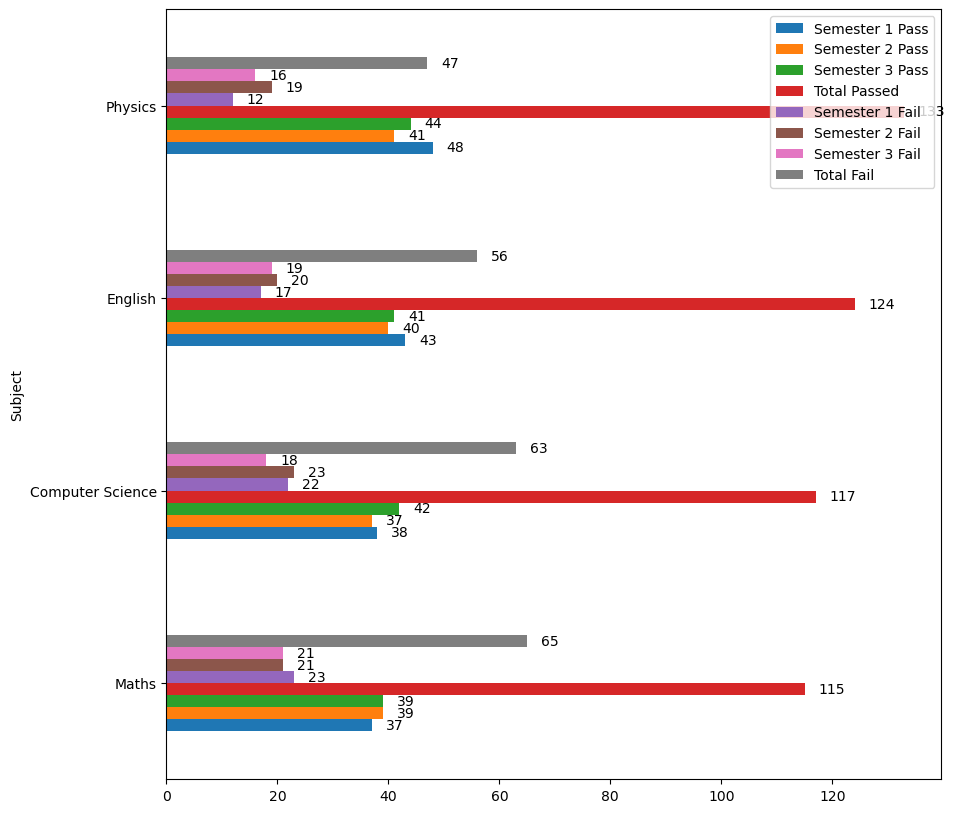

In [638]:
semester1 = [maths1,cs1,english1,physics1]
semester2  =[maths2,cs2,english2,physics2]
semester3 = [maths3,cs3,english3,physics3]
semester1_fail = [maths_fail1,cs_fail1,english_fail1,physics_fail1]
semester2_fail = [maths_fail2,cs_fail2,english_fail2,physics_fail2]
semester3_fail = [maths_fail3,cs_fail3,english_fail3,physics_fail3]
total_fail = [maths_total_fail,cs_total_fail,english_total_fail,physics_total_fail]
total_sem = [maths_total,cs_total,english_total,physics_total]
subjects = ["Maths","Computer Science","English","Physics"]
cols = ["Semester 1 Pass", "Semester 2 Pass","Semester 3 Pass","Total Passed","Semester 1 Fail","Semester 2 Fail", "Semester 3 Fail","Total Fail"]

df_total = pd.DataFrame([semester1,semester2,semester3,total_sem,semester1_fail,semester2_fail,semester3_fail,total_fail])

df_total = df_total.T
df_total.columns  = cols
df_total.index = subjects
df_total.index.rename("Subject",inplace=True)
ax = df_total.plot(kind="barh", figsize=(10,10))
for i in range(0,8):
    ax.bar_label(ax.containers[i], label_type='edge',padding=10)

plt.plot()


In [333]:
df_total

,Semester 1 Pass,Semester 2 Pass,Semester 3 Pass,Total Passed,Semester 1 Fail,Semester 2 Fail,Semester 3 Fail,Total Fail
Subject,,,,,,,,
Maths,37,39,39,115,23,21,21,65
Computer Science,38,37,42,117,22,23,18,63
English,43,40,41,124,17,20,19,56
Physics,48,41,44,133,12,19,16,47


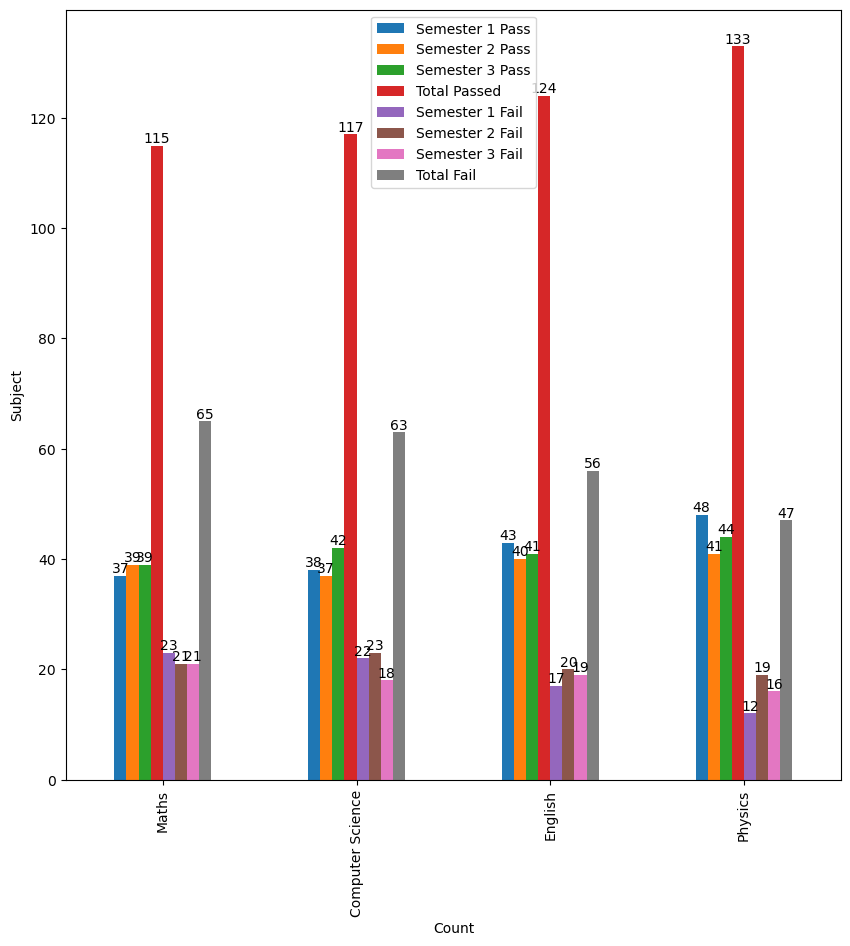

<Figure size 2000x2000 with 0 Axes>

In [637]:
ax = df_total.plot(kind="bar", figsize=(10,10))
ax.set_xlabel("Count")
ax.set_ylabel("Subject")
rects = ax.patches

for i in range(0,8):
    ax.bar_label(ax.containers[i], label_type='edge')
plt.figure(figsize=(20, 20))
plt.show()

In [335]:
lst_labels = []
for i in df_total.iterrows():
    for j in i:
        lst_labels.append(j)


In [658]:
df_data = pd.concat([sem1,sem2,sem3],axis=0)

In [659]:
maths = (df_data.Maths>=30).value_counts()
english = (df_data.English>=30).value_counts()
physics = (df_data.Physics>=30).value_counts()
cs = (df_data["Computer Science"]>=30).value_counts()


In [660]:
lst = [maths,english,physics,cs]
lst_pass = [lst[x][1] for x in range(0,len(lst))]
lst_fail = [lst[x][0] for x in range(0,len(lst))]

In [661]:
total_data = pd.DataFrame([lst_pass,lst_fail])
total_data = total_data.T
total_data.columns = ["Pass","Fail"]
total_data.index = df_data.columns[3:]



[115, 65, 124, 56, 133, 47, 117, 63]


<Figure size 1200x800 with 0 Axes>

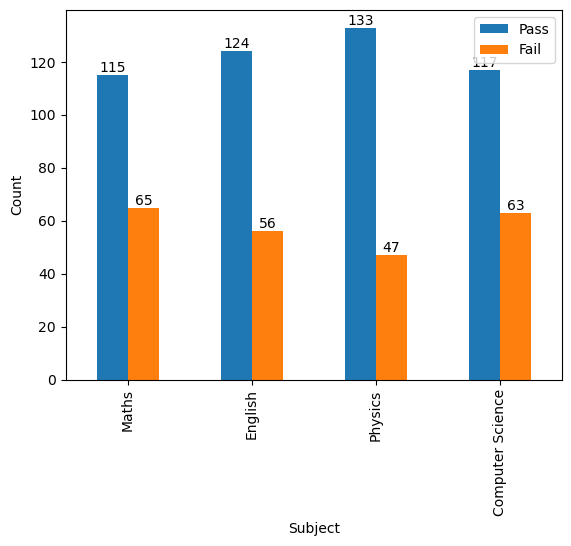

In [662]:
lst_labels = []

for i in total_data.iterrows():
    lst_labels.append(i[1][0])
    lst_labels.append(i[1][1])

plt.figure(figsize=(12, 8))
ax = total_data.plot(kind="bar")
ax.set_xlabel("Subject")
ax.set_ylabel("Count")
rects = ax.patches

print(lst_labels)
# Make some labels.
label = lst_labels
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')

plt.show()

In [663]:
df_data.drop("ID", axis=1, inplace=True)
df_data.columns[2:]

Index(['Maths', 'English', 'Physics', 'Computer Science'], dtype='object')

In [664]:
results = df_data.groupby(["Semester ","Name"])

In [844]:
def calculate_score(sem_num):
   
    maths = df_data[(df_data["Semester "]==sem_num) & (df_data["Maths"]>=30)]
    english = df_data[(df_data["Semester "]==sem_num) & (df_data["English"]>=30)]
    physics = df_data[(df_data["Semester "]==sem_num) & (df_data["Physics"]>=30)]
    cs = df_data[(df_data["Semester "]==sem_num) & (df_data["Computer Science"]>=30)]
            
    
    return maths, english, physics, cs

In [847]:
maths_sem1, english_sem1, physics_sem1, cs_sem1 = calculate_score(1)
maths_sem2, english_sem2, physics_sem2, cs_sem2 = calculate_score(2)
maths_sem3, english_sem3, physics_sem3, cs_sem3 = calculate_score(3)
print(len(maths_sem1["Maths"]))

37


In [711]:
result_1 = [maths_sem1, english_sem1, physics_sem1, cs_sem1]
result_2=[maths_sem2, english_sem2, physics_sem2, cs_sem2]
result_3= [maths_sem3, english_sem3, physics_sem3, cs_sem3]
sem1_pass = [x[1] for x in result_1]
sem2_pass = [x[1] for x in result_2]
sem3_pass = [x[1] for x in result_3]
sem1_fail = [x[0] for x in result_1]
sem2_fail = [x[0] for x in result_2]
sem3_fail = [x[0] for x in result_3]

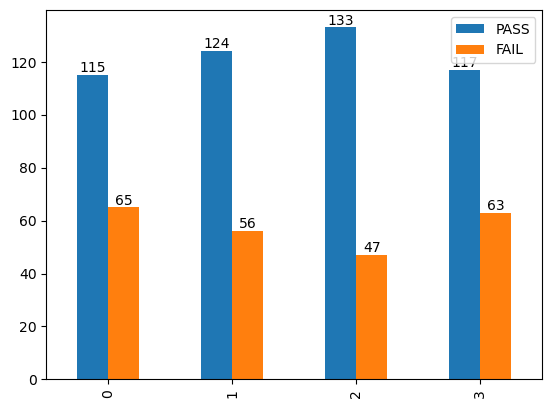

In [721]:
cols = ["PASS","FAIL"]
sem_1 = pd.DataFrame([sem1_pass,sem1_fail]).T
sem_1.columns =cols
ax = sem_1.plot(kind = "bar")
for i in range(len(cols)):
    ax.bar_label(ax.containers[i],label_type="edge")


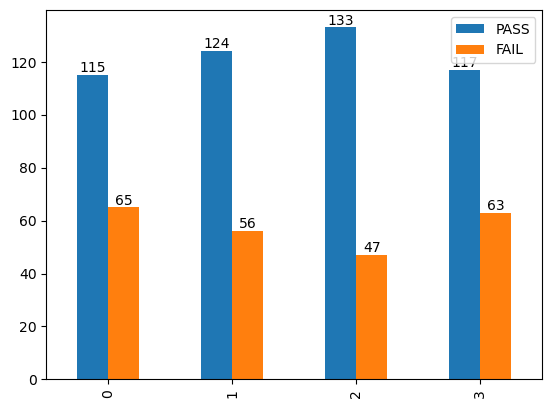

In [722]:
cols = ["PASS","FAIL"]
sem_1 = pd.DataFrame([sem2_pass,sem2_fail]).T
sem_1.columns =cols
ax = sem_1.plot(kind = "bar")
for i in range(len(cols)):
    ax.bar_label(ax.containers[i],label_type="edge")